# IMDB Data EDA

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [10]:
df1 = pd.read_csv('summer_movies.csv')
df2 = pd.read_csv('summer_movie_genres.csv')

In [28]:
print("Here are the data type for datafraome 1\n\n" ,  df1.dtypes)
print("Here are the data type for dataframe 2\n\n" ,  df2.dtypes)

Here are the data type for datafraome 1

 tconst              object
title_type          object
primary_title       object
original_title      object
year               float64
runtime_minutes    float64
genres              object
simple_title        object
average_rating     float64
num_votes            int64
dtype: object
Here are the data type for dataframe 2

 tconst    object
genres    object
dtype: object


### Data Inspection

In [33]:
df1.sample(5)

,tconst,title_type,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes
526,tt14625190,movie,It's a Summer Film!,Summer film ni notte,2020.0,97.0,"Comedy,Drama,Fantasy",its a summer film,6.8,1234
733,tt3374966,movie,The Mafia Kills Only in Summer,La mafia uccide solo d'estate,2013.0,90.0,"Comedy,Crime,Drama",the mafia kills only in summer,7.1,8936
662,tt2363564,movie,Barcelona Summer Night,Barcelona nit d'estiu,2013.0,96.0,"Comedy,Drama,Romance",barcelona summer night,6.2,1409
396,tt0928020,movie,Bad Boys of Summer,Bad Boys of Summer,2007.0,76.0,"Documentary,Sport",bad boys of summer,6.4,18
100,tt0078341,tvMovie,Summer of My German Soldier,Summer of My German Soldier,1978.0,100.0,"Drama,Romance,War",summer of my german soldier,7.8,466


In [35]:
df2.sample(5)

,tconst,genres
882,tt1304582,NaN
835,tt1202539,Sport
69,tt0053292,Romance
1457,tt6046754,Comedy
683,tt0791303,Drama


In [37]:
df1.head()

,tconst,title_type,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes
0,tt0011462,movie,Midsummer Madness,Midsummer Madness,1920.0,60.0,Drama,midsummer madness,7.4,19
1,tt0026714,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931
2,tt0033864,movie,The Teachers on Summer Vacation,Magistrarna på sommarlov,1941.0,86.0,Comedy,the teachers on summer vacation,5.5,78
3,tt0037325,movie,Summer Storm,Summer Storm,1944.0,106.0,"Crime,Drama,Film-Noir",summer storm,6.6,688
4,tt0038406,movie,Centennial Summer,Centennial Summer,1946.0,102.0,"History,Music,Romance",centennial summer,6.1,431


In [39]:
df2.head()

,tconst,genres
0,tt0011462,Drama
1,tt0026714,Comedy
2,tt0026714,Fantasy
3,tt0026714,Romance
4,tt0033864,Comedy


### Merge Dataset

In [46]:
df3= pd.merge(df1,df2,on= 'tconst',how='left')
df3.head()

,tconst,title_type,primary_title,original_title,year,runtime_minutes,genres_x,simple_title,average_rating,num_votes,genres_y
0,tt0011462,movie,Midsummer Madness,Midsummer Madness,1920.0,60.0,Drama,midsummer madness,7.4,19,Drama
1,tt0026714,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931,Comedy
2,tt0026714,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931,Fantasy
3,tt0026714,movie,A Midsummer Night's Dream,A Midsummer Night's Dream,1935.0,133.0,"Comedy,Fantasy,Romance",a midsummer nights dream,6.8,3931,Romance
4,tt0033864,movie,The Teachers on Summer Vacation,Magistrarna på sommarlov,1941.0,86.0,Comedy,the teachers on summer vacation,5.5,78,Comedy


### Identify Basic Information 

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1585 non-null   object 
 1   title_type       1585 non-null   object 
 2   primary_title    1585 non-null   object 
 3   original_title   1585 non-null   object 
 4   year             1584 non-null   float64
 5   runtime_minutes  1513 non-null   float64
 6   genres_x         1567 non-null   object 
 7   simple_title     1585 non-null   object 
 8   average_rating   1585 non-null   float64
 9   num_votes        1585 non-null   int64  
 10  genres_y         1567 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 136.3+ KB


In [55]:
round(df3.describe(),2)

,year,runtime_minutes,average_rating,num_votes
count,1584.00,1513.00,1585.00,1585.00
mean,2000.79,91.76,6.25,3311.79
std,19.80,24.38,1.23,26461.46
min,1920.00,5.00,2.30,10.00
25%,1989.00,83.00,5.50,41.00
50%,2008.00,92.00,6.30,178.00
75%,2016.00,102.00,7.10,733.00
max,2024.00,237.00,9.80,564894.00


### Check for null value

In [83]:
df3.isnull().sum()

tconst              0
title_type          0
primary_title       0
original_title      0
year                1
runtime_minutes    72
genres_x           18
simple_title        0
average_rating      0
num_votes           0
genres_y           18
dtype: int64

#### Present in Graphical Form

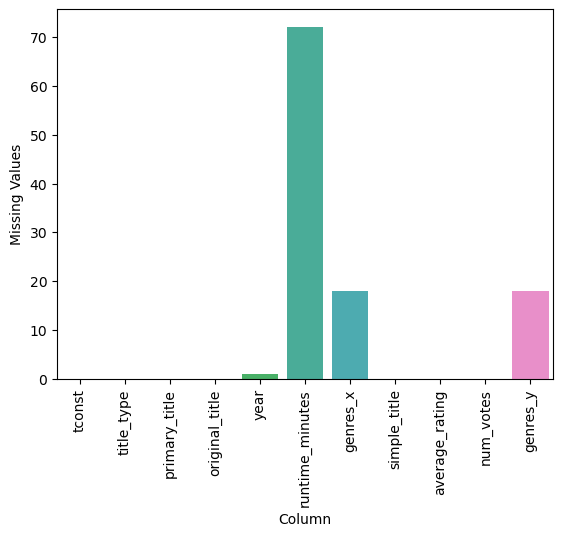

In [77]:
missing_values = df3.isnull().sum()
missing_values = missing_values.reset_index()
missing_values.columns = ['Column', 'Missing Values']

# Plot using sns.barplot
sns.barplot(x='Column', y='Missing Values', data=missing_values)
plt.xticks(rotation=90)  # Rotate x labels if column names are long
plt.show()

### Handling Missing Values

In [137]:
df3['year'].fillna(df3['year'].median(),inplace=True)
df3['runtime_minutes'].fillna(df3['runtime_minutes'].mean(),inplace= True)
df3['genres_x'].fillna(df3['genres_x'].mode()[0],inplace= True)
df3['genres_y'].fillna(df3['genres_y'].mode()[0],inplace= True)

In [139]:
df3.isnull().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
year               0
runtime_minutes    0
genres_x           0
simple_title       0
average_rating     0
num_votes          0
genres_y           0
dtype: int64

### Apply EDA

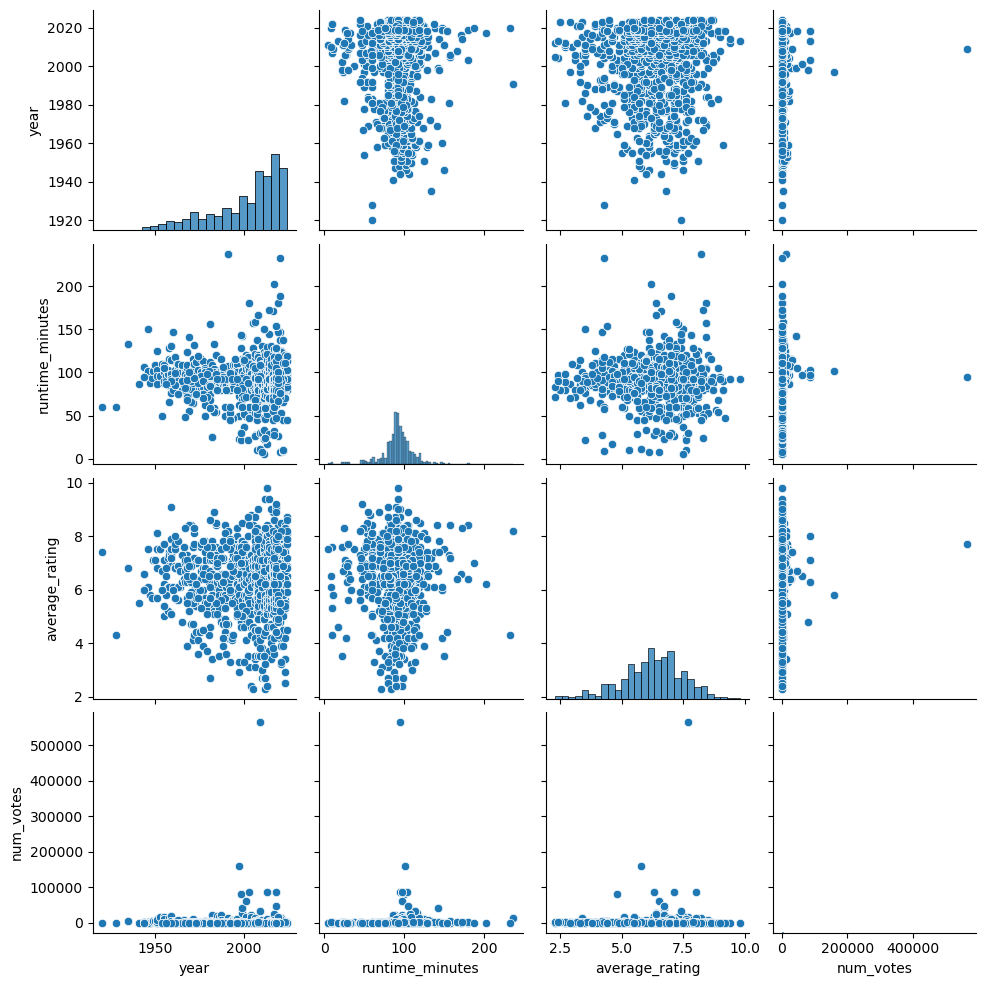

In [242]:
sns.pairplot(df3)

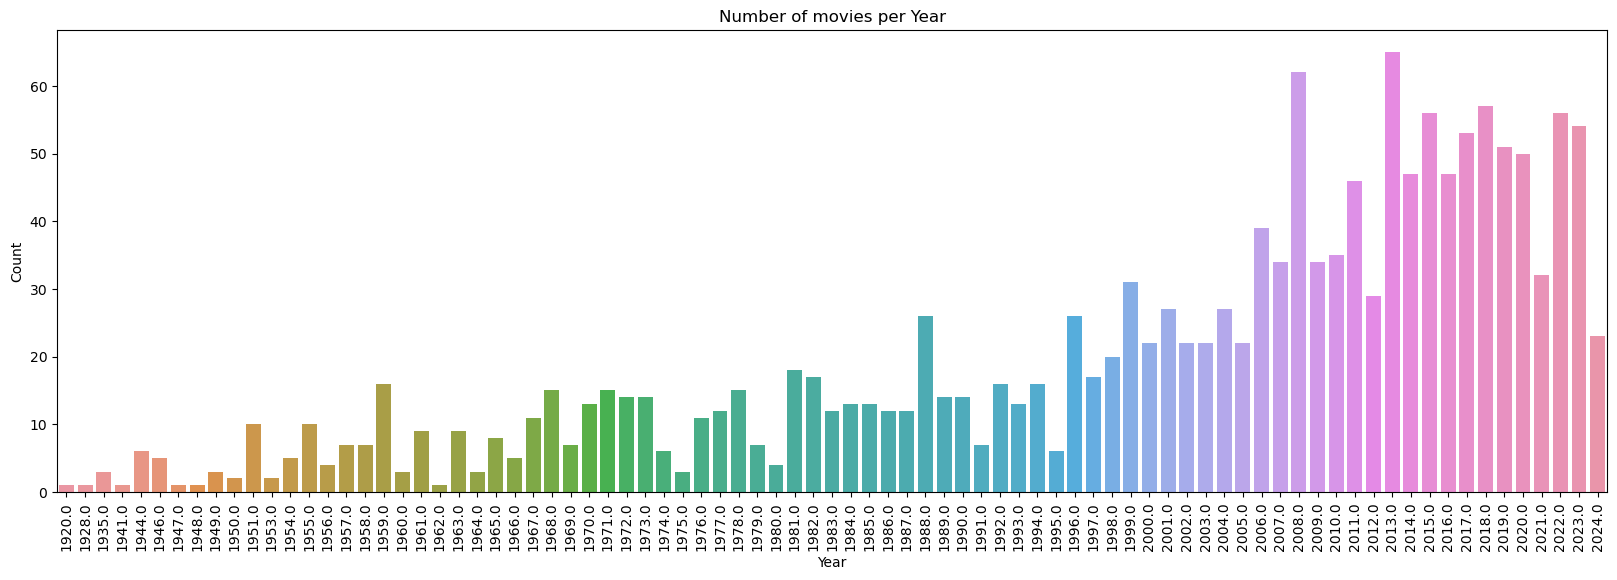

In [243]:
# Aggregate the data
year_count = df3['year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(20,6))
sns.barplot(x=year_count.index, y=year_count.values,)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of movies per Year')
plt.xticks(rotation=90)  # Rotate x labels if they are long
plt.show()


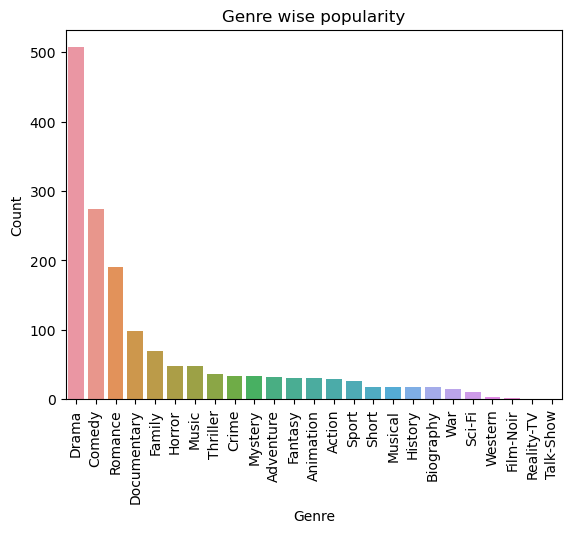

In [343]:
# Geners Distribution
gene_count= df3['genres_y'].value_counts().sort_values(ascending=False)
sns.barplot(x=gene_count.index,y = gene_count.values,capsize=50)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre wise popularity')
plt.xticks(rotation=90)
plt.show()

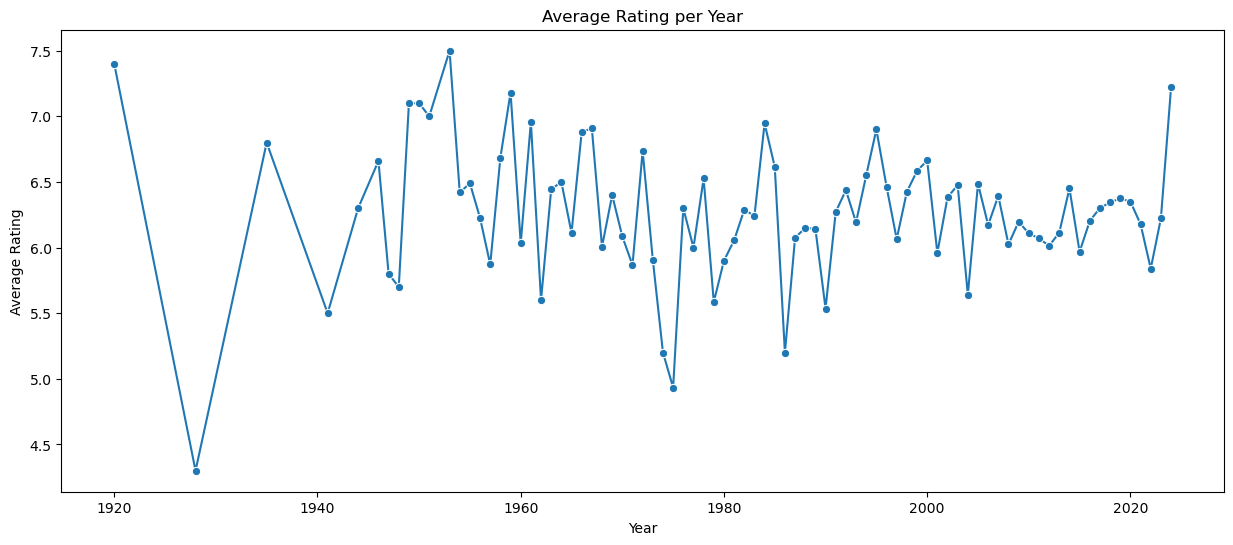

In [434]:
# Average Rating per year
plt.figure(figsize=(15,6))
grp_by=df3.groupby('year')['average_rating'].mean()
year_bin=list(range(int(df3['year'].min()),int(df3['year'].max()),10))
sns.lineplot(x=grp_by.index,y= grp_by.values,marker='o',linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()


<Axes: xlabel='title_type'>

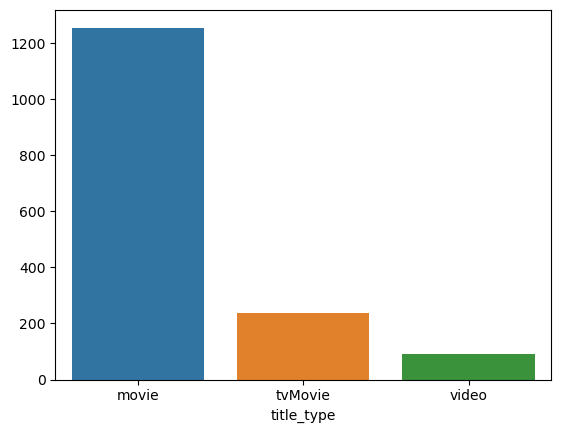

In [502]:
# Movie Type per year

movie_type= df3.groupby('title_type')['year'].count()
sns.barplot(x = movie_type.index,y= movie_type.values)
